# EDA

Requirements: <br>

In [15]:
pip install plotly

     |████████████████████████████████| 15.2 MB 3.0 MB/s eta 0:00:01    |███████▏                        | 3.4 MB 5.2 MB/s eta 0:00:03
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


seed = 23

drop_cols = [
    'Unnamed: 0'
]

df_ref = {
    'phone': pd.read_csv('data/csv/grouped_phone.csv').drop(columns=drop_cols),
    'watch': pd.read_csv('data/csv/grouped_watch.csv').drop(columns=drop_cols)
}

model_ref = {
    'Decision Tree': DecisionTreeClassifier(random_state=seed),    
}

df_ref['phone']['code'] = df_ref['phone']['code'].astype('category')
df_ref['watch']['code'] = df_ref['watch']['code'].astype('category')

grouped_phone_df = df_ref['phone']
grouped_watch_df = df_ref['watch']

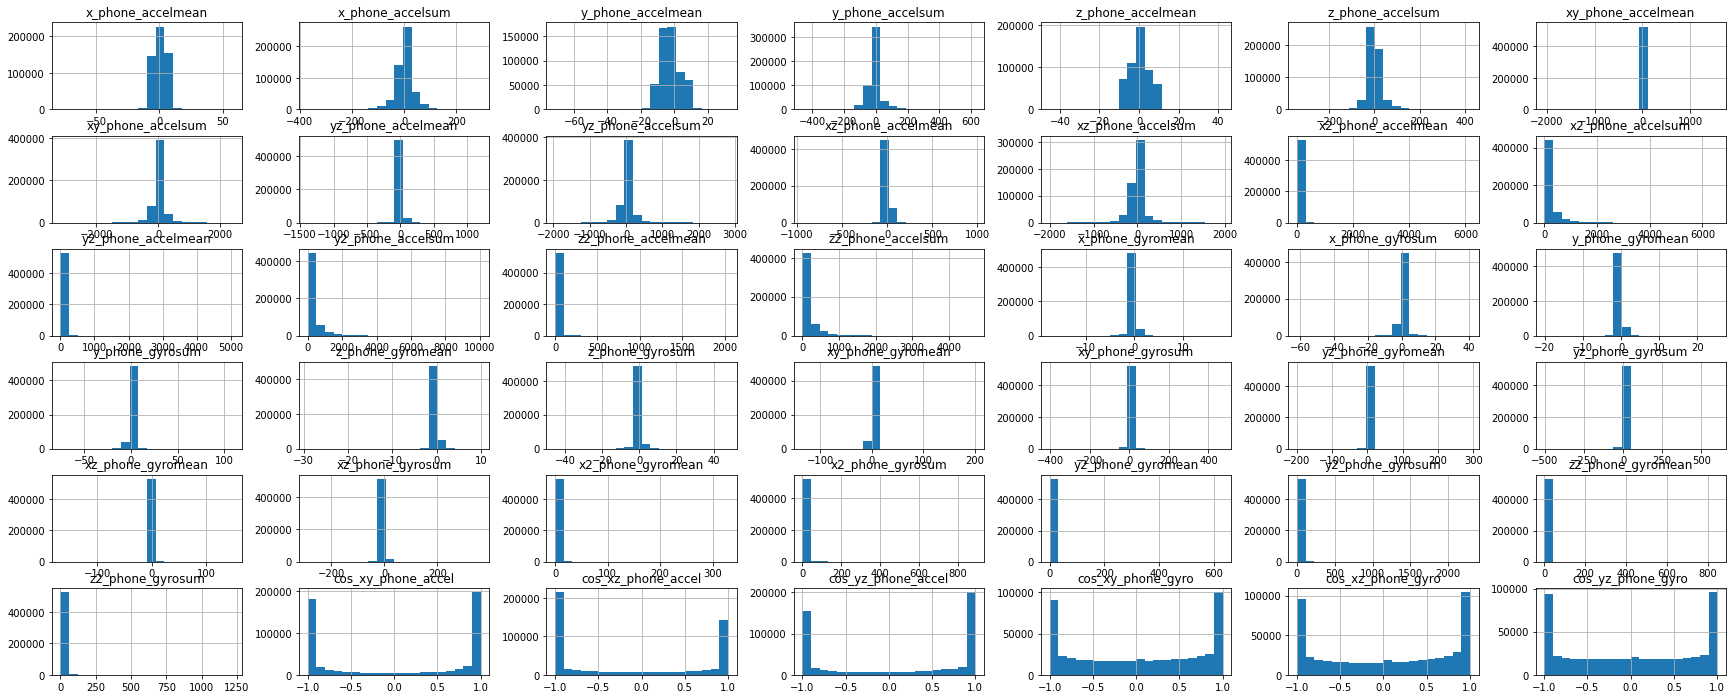

In [17]:
grouped_phone_df.hist(bins = 20, layout = (6, 7), figsize=(30, 12))
plt.show()

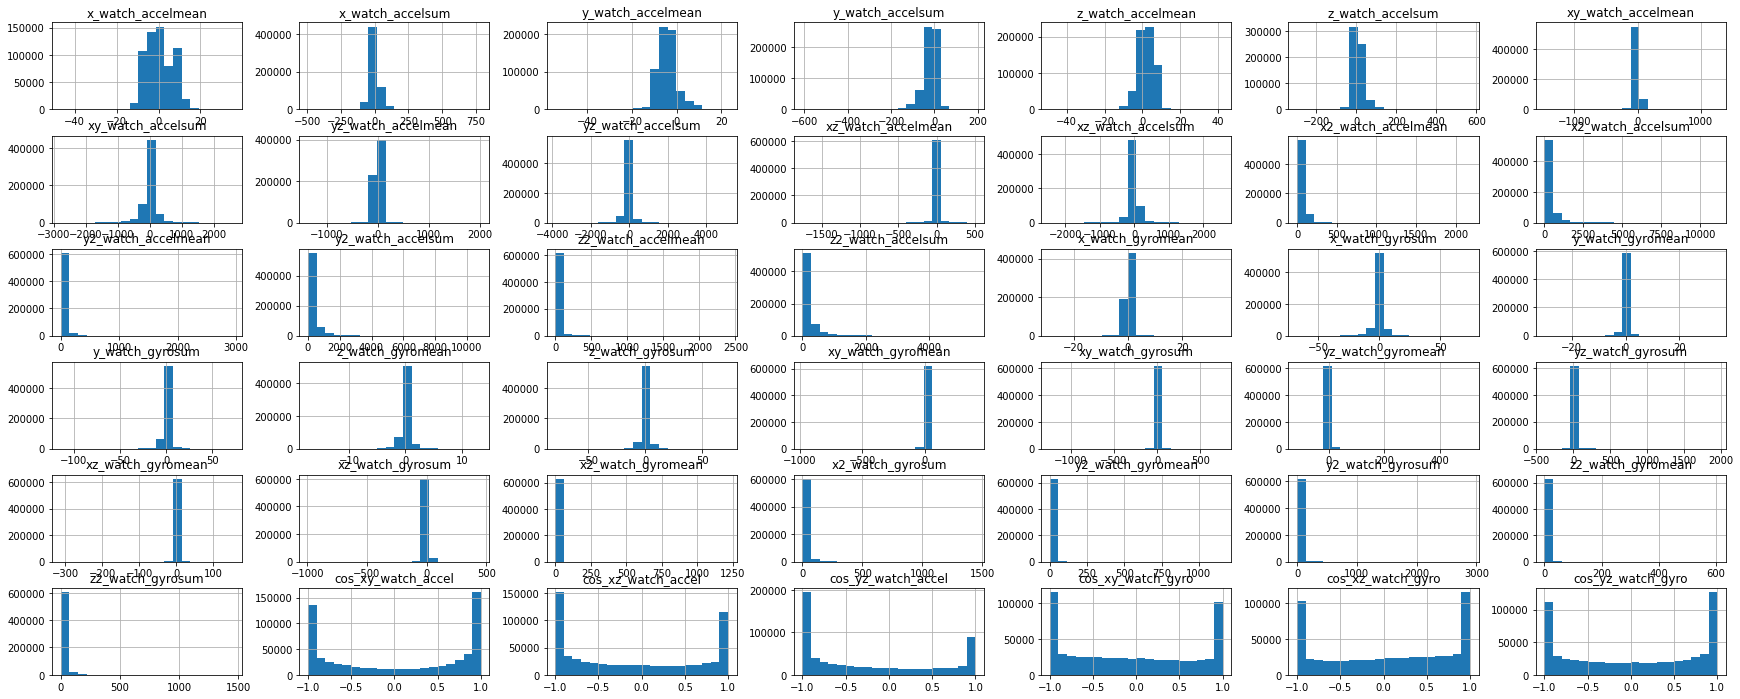

In [18]:
grouped_watch_df.hist(bins = 20, layout = (6, 7), figsize=(30, 12))
plt.show()

## Plotly 

In [19]:
renderer = [
    'notebook', # local
    'notebook_connected', # local
    'kaggle', # local
    'azure', # local
    'browser', # local (opens plot in new browser tab)
    'iframe', # docker, local (saves plot in `iframe_figures` folder)
    'iframe_connected', # docker, local (saves plot in `iframe_figures` folder)
    'colab' # docker
]

# phone accelerometer
# take a sample of the data

df = grouped_phone_df.sample(frac=0.3, random_state=seed).sort_values(by='code')
fig = px.scatter_3d(
    df,  x='x_phone_accelsum', y='y_phone_accelsum', z='z_phone_accelsum', color='code', title='Phone Accelerometer'
)
fig.update_layout(height=1000)
fig.show(renderer=renderer[-2]) # if plot does not render, try a different index, the last three are preferred

In [20]:
# phone gyroscope

# take a sample of the data
df = grouped_phone_df.sample(frac=0.3, random_state=seed).sort_values(by='code')
fig = px.scatter_3d(df, 
                    x='x_phone_gyrosum', 
                    y='y_phone_gyrosum', 
                    z='x_phone_gyrosum',
                    color = 'code',
                    title='Phone Gyroscope'
                   )
fig.update_layout(height=1000)
fig.show(renderer=renderer[-2]) # if plot does not render, try a different index, the last three are preferred